<a href="https://colab.research.google.com/github/Rafal-Wawrzak/Project_2/blob/main/Project_2_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: Cleaning and loading



##Importing Items

Need this to get catagorical heat maps to work

>Heat maps not working for some reason...

In [1]:
#!pip install dython
from dython import nominal

Normal imports

In [82]:
import pandas as pd
import numpy as np
#import seaborn to make a nice heatmap for our confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_confusion_matrix

In [34]:
from sklearn import set_config
set_config(display='diagram')

In [4]:
path  =  'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

##Functions

In [5]:
def printNull(dataFrame):
    '''
    prints the Nulls in a Data Set
    '''
    print(dataFrame.isnull().sum())

def dataFrameValuesCounts(dataFrame):
    for i in dataFrame:
        print(f'------ {i} ------')
        print('\n\n')
        print(dataFrame[i].value_counts())
        print('-------------------')

In [6]:
def barGroupCount(dataFrame, mainColumn, secoundColumn= None,plot = 'bar',titleFontSize = 25,  tickSize = 10, labelSize = 25, figureSize = (12, 10),y_rot = 0,  x_rot = 0,gridAxis = 'y'):
    if secoundColumn == None:
        for i in dataFrame:
            plt.figure(figsize = figureSize)
            plt.title(f'This graph shows  the count by {i}',
                      fontsize = titleFontSize)
            plt.ylabel('Count',
                       fontsize = labelSize)
            plt.yticks(fontsize=tickSize,
                       rotation = y_rot)
            plt.xlabel(i,
                       fontsize = labelSize)
            plt.xticks(fontsize=tickSize,
                       rotation = x_rot)
            plt.legend()
            plt.grid(axis = gridAxis)
            dataFrame.groupby(i)[i].count().plot(kind=plot)
            plt.show()
            print(i)    
    else:
        dataFrame.groupby(mainColumn).count().plot(kind = plot)

##data dictionary

|Cloumn Name| What it represents|
|---|---|
|class|Edible = e, poisonous = p|
|cap-shape|bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s|
|cap-surface|fibrous=f,grooves=g,scaly=y,smooth=s|
|cap-color|brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y|
|bruises?|bruises=t,no=f|
| odor|almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s|
|gill-attachment|attached=a,descending=d,free=f,notched=n|
| gill-spacing|close=c,crowded=w,distant=d|
|gill-size|broad=b,narrow=n|
| gill-color|black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y|
| stalk-shape|enlarging=e,tapering=t|
| stalk-root|bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?|
|stalk-surface-above-ring|fibrous=f,scaly=y,silky=k,smooth=s|
| stalk-surface-below-ring|fibrous=f,scaly=y,silky=k,smooth=s|
|stalk-color-above-ring|brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y|
|stalk-color-below-ring|brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y|
|veil-type|partial=p,universal=u|
|veil-color|brown=n,orange=o,white=w,yellow=y|
|ring-number|none=n,one=o,two=t|
|ring-type|cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z|
|spore-print-color|black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y|
|population|abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y|
|habitat|grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d|

deleted unnecessary columns

-deleted duplicate rows --- DONE ----

-identified and addressed missing values --- DONE ----

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats) --- DONE ----

-produced univariate visuals for the target and all features --- DONE ----

-identified outliers --- DONE ----

-produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another ---DONE---

-clearly commented all of your cleaning steps and described any decisions you made  (Note: During the final stack of the program, you will be making a presentation for a technical audience that includes your decisions and process in the cleaning steps. The more notes you take now, the easier that presentation will be. To clarify, that presentation is NOT due now.) --- DONE ----

##Adding Dataframe

In [7]:
df = pd.read_csv(path,
                 sep=',',
                 header =  None)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [9]:
df.columns= ['class',
             'cap-shape',
             'cap-surface',
             'cap-color',
             'bruises',
             'odor',
             'gill-attachment',
             'gill-spacing',
             'gill-size',
             'gill-color',
             'stalk-shape',
             'stack-root',
             'stalk-surface-above-ring',
             'stalk-surface-below-ring',
             'stalk-color-above-ring',
             'stalk-color-below-ring',
             'veil-type',
             'veil-color',
             'ring-number',
             'ring-type',
             'spore-print-color',
             'population',
             'habitat']

In [10]:
printNull(df)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stack-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stack-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [12]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stack-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


##converting letter, to name for clearification

There are single values that are good, and others that are very bad i.e. 

|what letter repsents|the letter|
|---|---|
|red |e|
| green| r|

Making the lettes not work correctly.

In [13]:
##slowly changing from letter to words so i can understand  the data better
df['class'] = df ['class'].map({'e':'Edible',
                                'p':'Poisonous'})

df['cap-shape'] = df['cap-shape'].map({'b':'bell',
                                       'c':'conical',
                                       'x':'convex',
                                       'f':'flat',
                                       'k':'knobbed',
                                       's':'sunken'})

df['cap-surface']=df['cap-surface'].map({'f':'fibrous',
                                         'g':'grooves',
                                         'y':'scaly',
                                         's':'smooth'})

df['cap-color']= df['cap-color'].map({'n':'brown',
                                      'b':'buff',
                                      'c':'cinnamon',
                                      'g':'gray',
                                      'r':'green',
                                      'p':'pink',
                                      'u':'purple',
                                      'e':'red',
                                      'w':'white',
                                      'y':'yellow'})

df['stalk-color-below-ring']= df['stalk-color-below-ring'].map({'n':'brown',
                                                                'b':'buff',
                                                                'c':'cinnamon',
                                                                'g':'gray',
                                                                'p':'pink',
                                                                'e':'red',
                                                                'w':'white',
                                                                'y':'yellow',
                                                                'o':'orange'})

df['stalk-color-above-ring']= df['stalk-color-above-ring'].map({'n':'brown',
                                                                'b':'buff',
                                                                'c':'cinnamon',
                                                                'g':'gray',
                                                                'p':'pink',
                                                                'e':'red',
                                                                'w':'white',
                                                                'y':'yellow',
                                                                'o':'orange'})

df['bruises']= df['bruises'].map ({'t':'bruises',
                                   'f':'no'})

|Cloumn Name| What it represents|
|---|---|
|
|odor|almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s|
|gill-attachment|attached=a,descending=d,free=f,notched=n|
|gill-spacing|close=c,crowded=w,distant=d|
|gill-size|broad=b,narrow=n|
|gill-color|black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y|
|stalk-shape|enlarging=e,tapering=t|
|stalk-root|bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?|
|stalk-surface-above-ring|fibrous=f,scaly=y,silky=k,smooth=s|
|stalk-surface-below-ring|fibrous=f,scaly=y,silky=k,smooth=s|
|veil-type|partial=p,universal=u|
|veil-color|brown=n,orange=o,white=w,yellow=y|
|ring-number|none=n,one=o,two=t|
|ring-type|cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z|
|spore-print-color|black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y|
|population|abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y|
|habitat|grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d|

#Part 2: Exploring the Data

##looking at the data set in more deail

In [14]:
dataFrameValuesCounts(df)

------ class ------



Edible       4208
Poisonous    3916
Name: class, dtype: int64
-------------------
------ cap-shape ------



convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: cap-shape, dtype: int64
-------------------
------ cap-surface ------



scaly      3244
smooth     2556
fibrous    2320
grooves       4
Name: cap-surface, dtype: int64
-------------------
------ cap-color ------



brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
purple        16
green         16
Name: cap-color, dtype: int64
-------------------
------ bruises ------



no         4748
bruises    3376
Name: bruises, dtype: int64
-------------------
------ odor ------



n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
-------------------
------ gill-attachment ------



f    7914
a     210
Name: gill-atta

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stack-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [16]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stack-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,convex,smooth,brown,bruises,p,f,c,n,k,e,e,s,s,white,white,p,w,o,p,k,s,u
1,Edible,convex,smooth,yellow,bruises,a,f,c,b,k,e,c,s,s,white,white,p,w,o,p,n,n,g
2,Edible,bell,smooth,white,bruises,l,f,c,b,n,e,c,s,s,white,white,p,w,o,p,n,n,m
3,Poisonous,convex,scaly,white,bruises,p,f,c,n,n,e,e,s,s,white,white,p,w,o,p,k,s,u
4,Edible,convex,smooth,gray,no,n,f,w,b,k,t,e,s,s,white,white,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,Edible,knobbed,smooth,brown,no,n,a,c,b,y,e,?,s,s,orange,orange,p,o,o,p,b,c,l
8120,Edible,convex,smooth,brown,no,n,a,c,b,y,e,?,s,s,orange,orange,p,n,o,p,b,v,l
8121,Edible,flat,smooth,brown,no,n,a,c,b,n,e,?,s,s,orange,orange,p,o,o,p,b,c,l
8122,Poisonous,knobbed,scaly,brown,no,y,f,c,n,b,t,?,s,k,white,white,p,w,o,e,w,v,l


In [17]:
boo =[]
for i in df:
    boo.append(i)

In [18]:
print(boo)

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stack-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


Umm i found a way to make a heat map from catagorical data...

URL: https://github.com/shakedzy/dython/issues/2

##Catagorical HeatMap


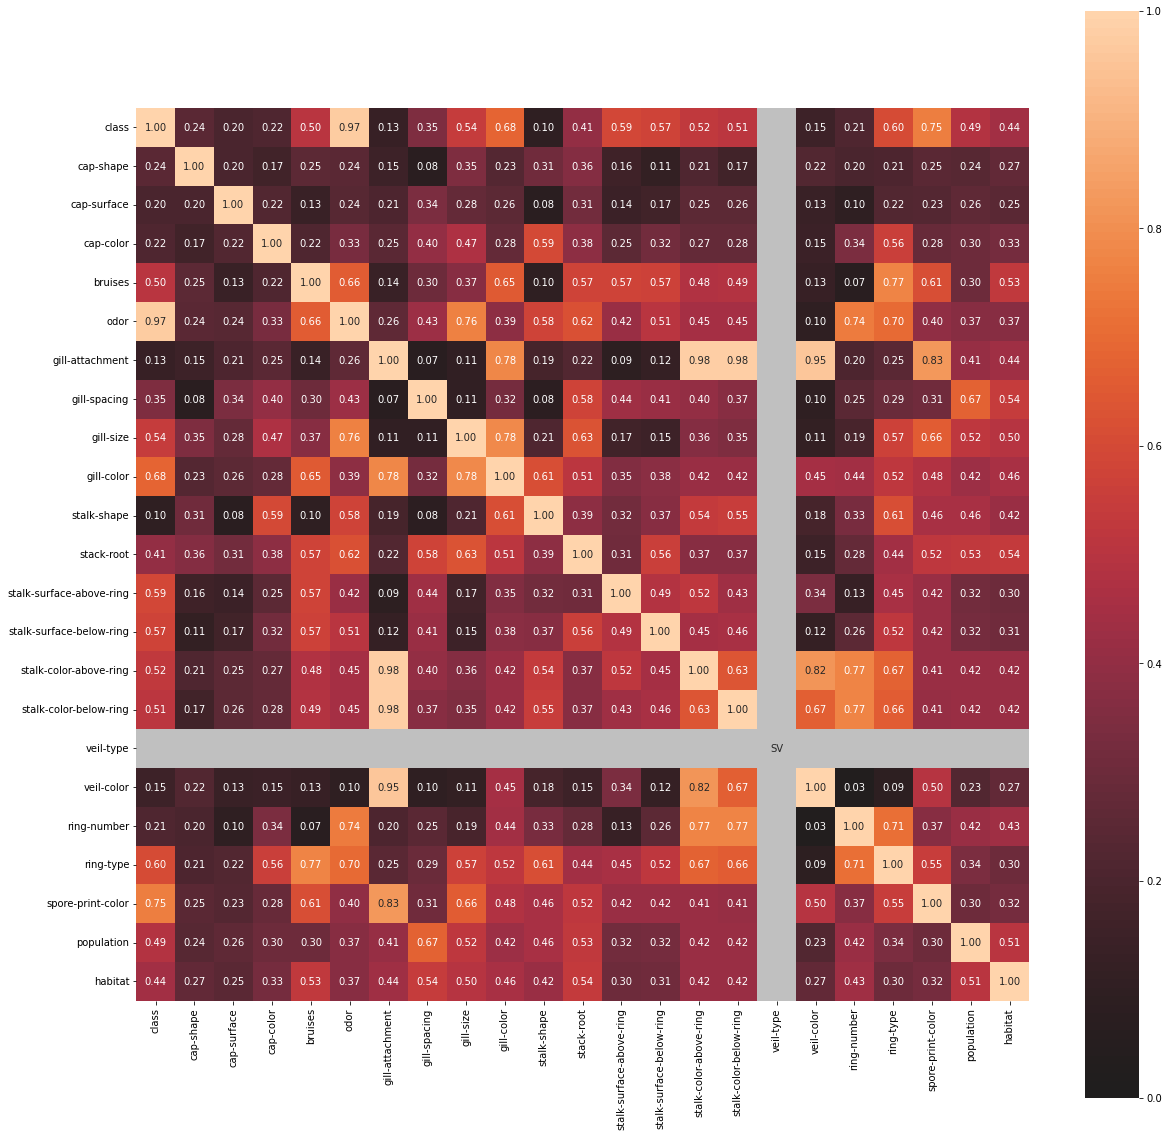

{'ax': <AxesSubplot:>,
 'corr':                              class  cap-shape  ...  population   habitat
 class                     1.000000   0.244330  ...    0.486775  0.439323
 cap-shape                 0.244330   1.000000  ...    0.240074  0.269842
 cap-surface               0.195997   0.202242  ...    0.260952  0.249577
 cap-color                 0.215889   0.168221  ...    0.304085  0.325199
 bruises                   0.501188   0.254415  ...    0.299568  0.530257
 odor                      0.970558   0.243577  ...    0.373698  0.368861
 gill-attachment           0.127951   0.152989  ...    0.413362  0.435707
 gill-spacing              0.347897   0.077849  ...    0.673533  0.541961
 gill-size                 0.539677   0.345956  ...    0.517249  0.498616
 gill-color                0.679877   0.232274  ...    0.423513  0.457212
 stalk-shape               0.101170   0.306119  ...    0.455486  0.417101
 stack-root                0.406224   0.359388  ...    0.529233  0.536186
 stalk-

In [19]:
nominal.associations(df, 
                     nominal_columns=boo,
                     figsize = (20,20))


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stack-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

{'boxes': [<matplotlib.lines.Line2D at 0x7f6e1ed3bed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6e1ed41710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6e1ed49050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6e1ed41c90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6e1ed41290>,
  <matplotlib.lines.Line2D at 0x7f6e1ed413d0>]}

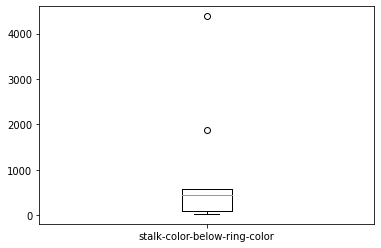

In [21]:
plt.boxplot([df['stalk-color-below-ring'].value_counts()], labels = ['stalk-color-below-ring-color'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


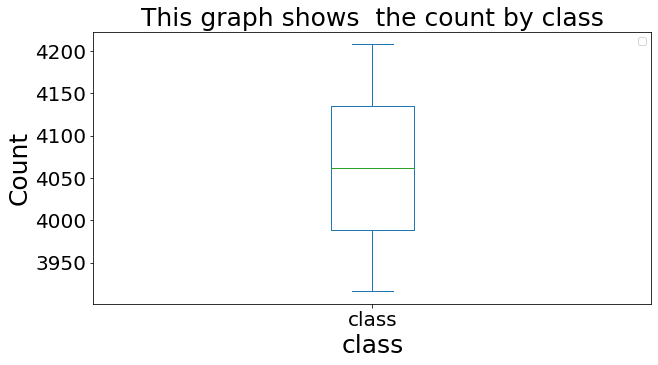

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


class


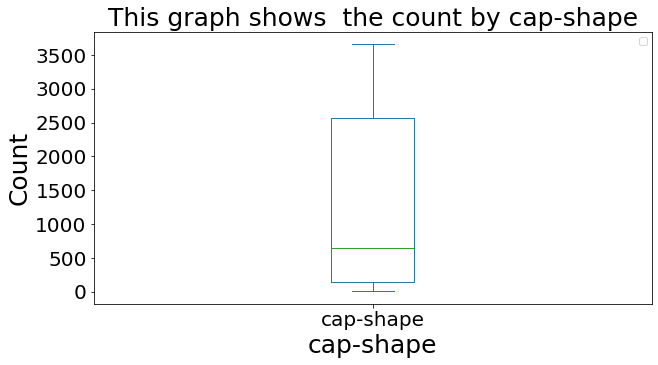

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


cap-shape


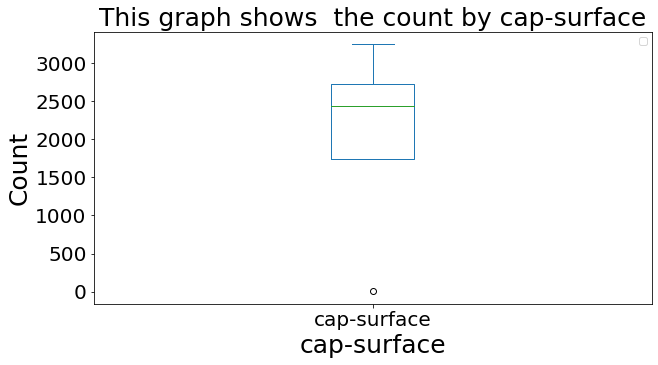

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


cap-surface


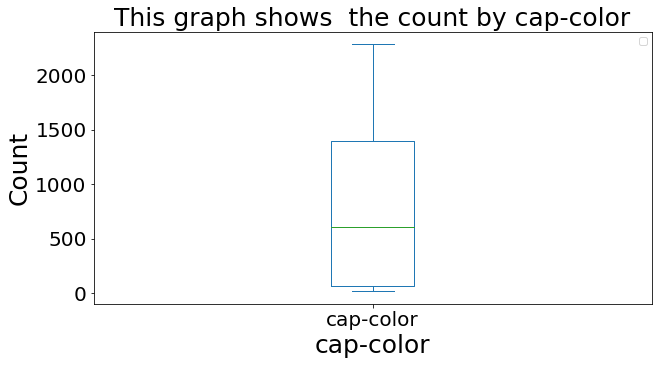

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


cap-color


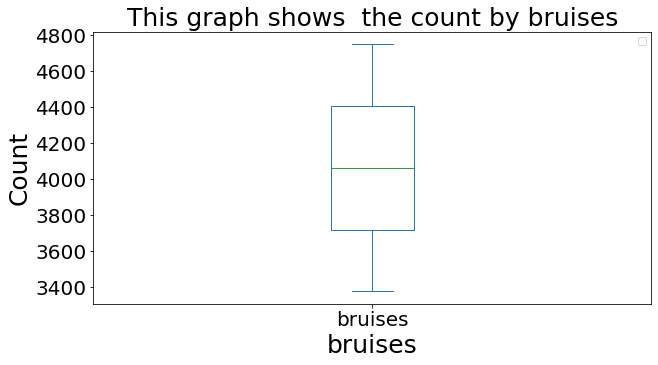

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


bruises


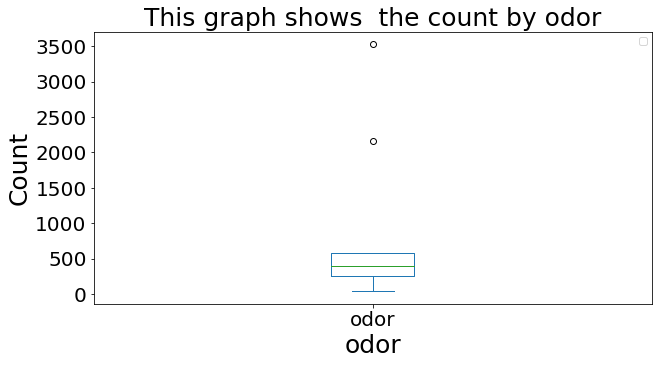

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


odor


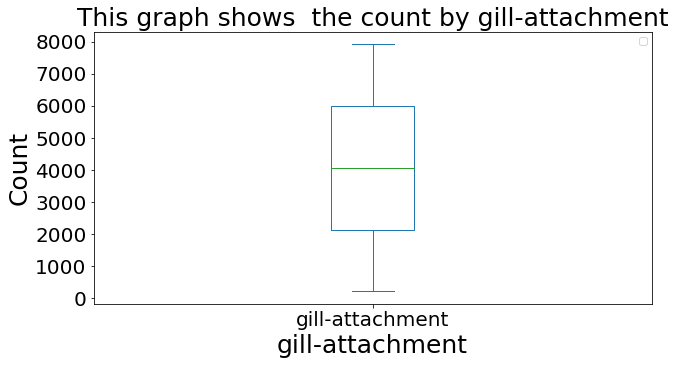

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


gill-attachment


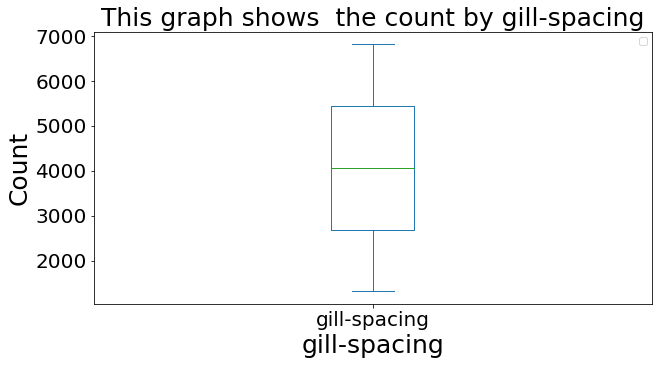

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


gill-spacing


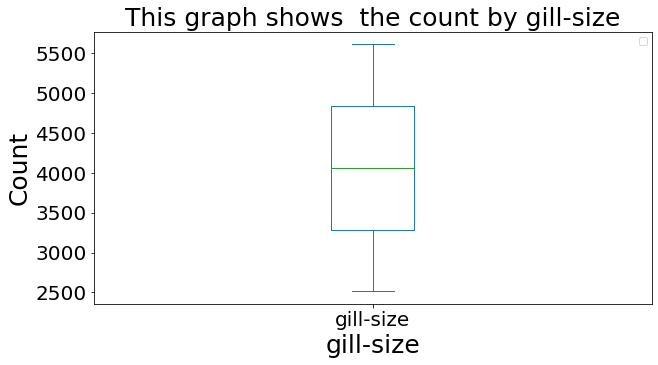

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


gill-size


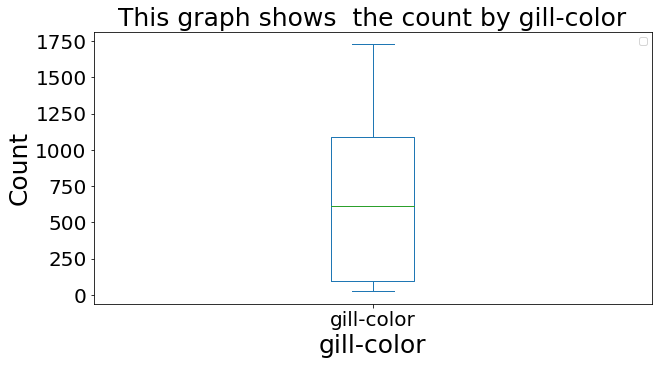

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


gill-color


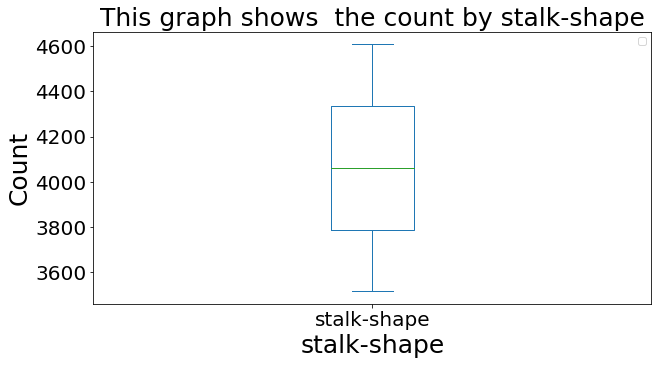

stalk-shape


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


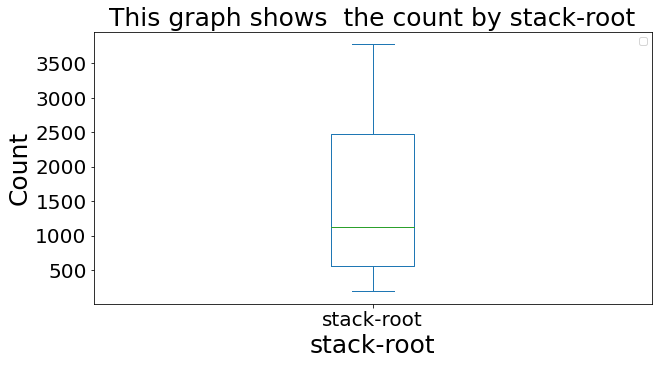

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


stack-root


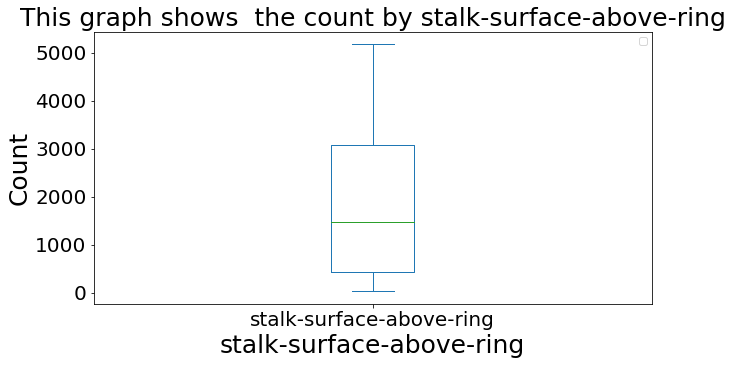

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


stalk-surface-above-ring


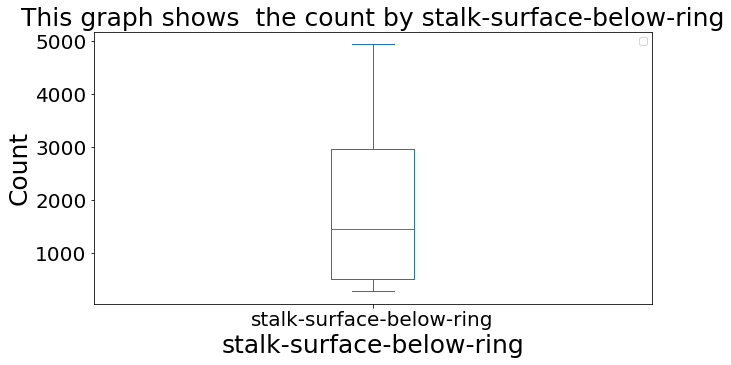

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


stalk-surface-below-ring


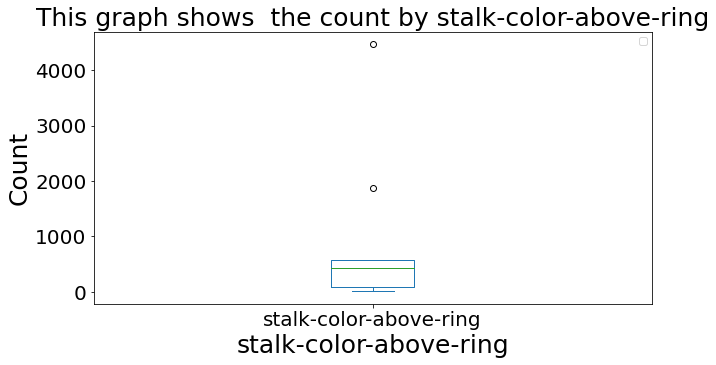

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


stalk-color-above-ring


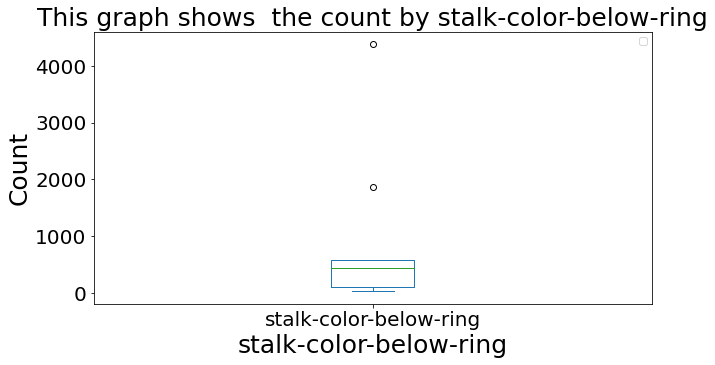

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


stalk-color-below-ring


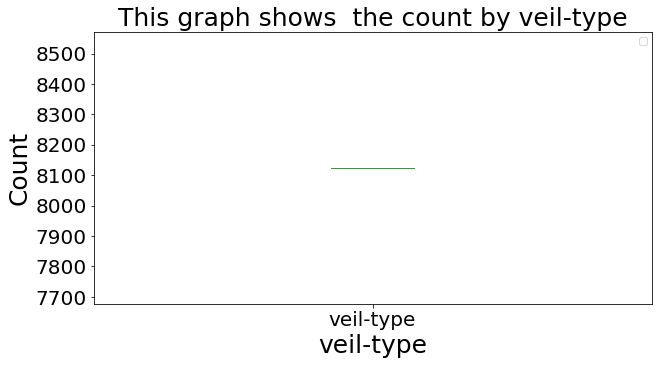

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


veil-type


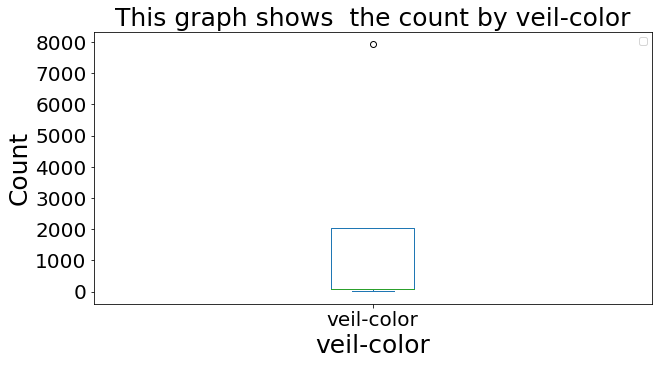

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


veil-color


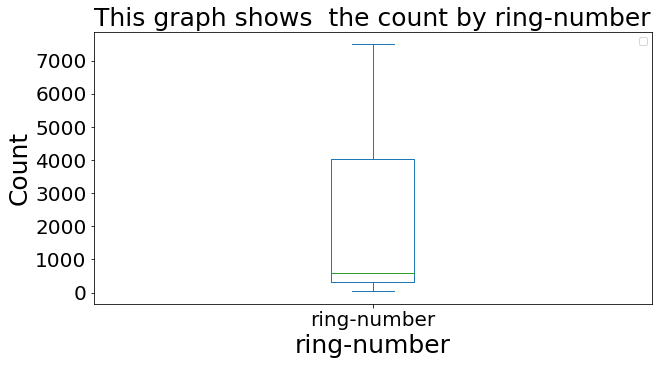

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ring-number


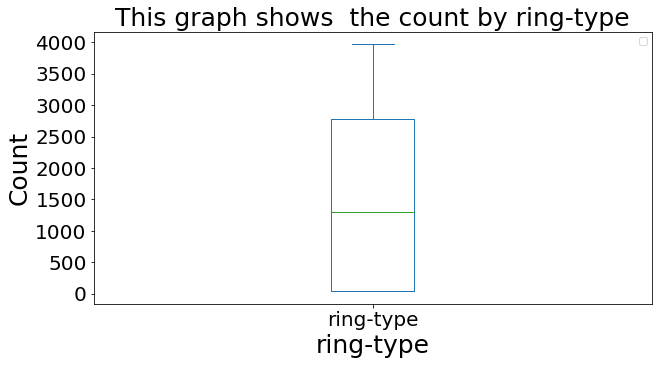

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ring-type


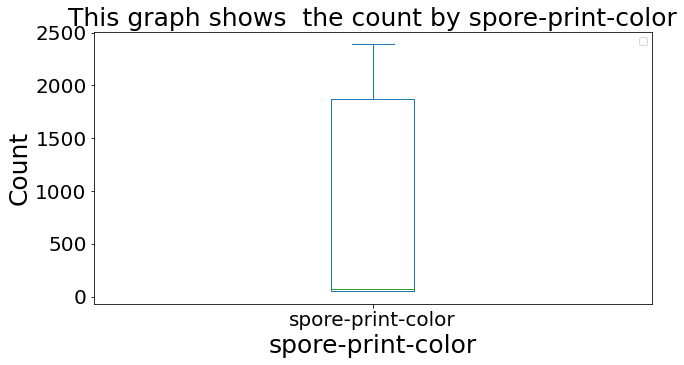

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


spore-print-color


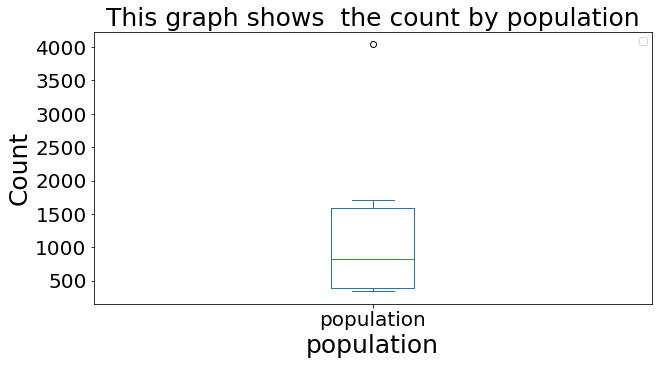

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


population


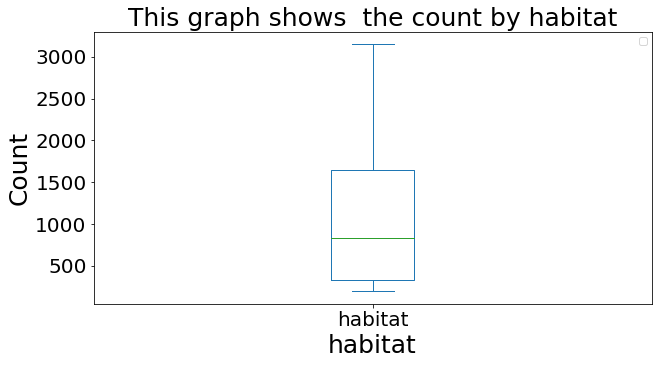

habitat
CPU times: user 6.25 s, sys: 1.08 s, total: 7.33 s
Wall time: 10.6 s


In [22]:
%%time
barGroupCount(df,
              'class',
              plot='box',
              tickSize=20,
              x_rot= 50,
              figureSize = (10,5))

In [23]:
df['odor'].value_counts()

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

###Outliers
>stalk-color-below-ring, and stalk-color-above-ring have the biggest  outliers, but they are also the most common mushroom colors

>cap-surface has  4 that are outliers which are grooves,  may drop these 4 (will look into later)

>odor most mushrooms don't have much smell and there is around 5.5k that has just 2 values while there is 8 others all under  600 each

>veil-type is just a drop, they are only one type,  nothing can be gained from it.

In [24]:
df.drop(columns ='veil-type',
        inplace = True)

Heatmap with out the 'veil-type' column

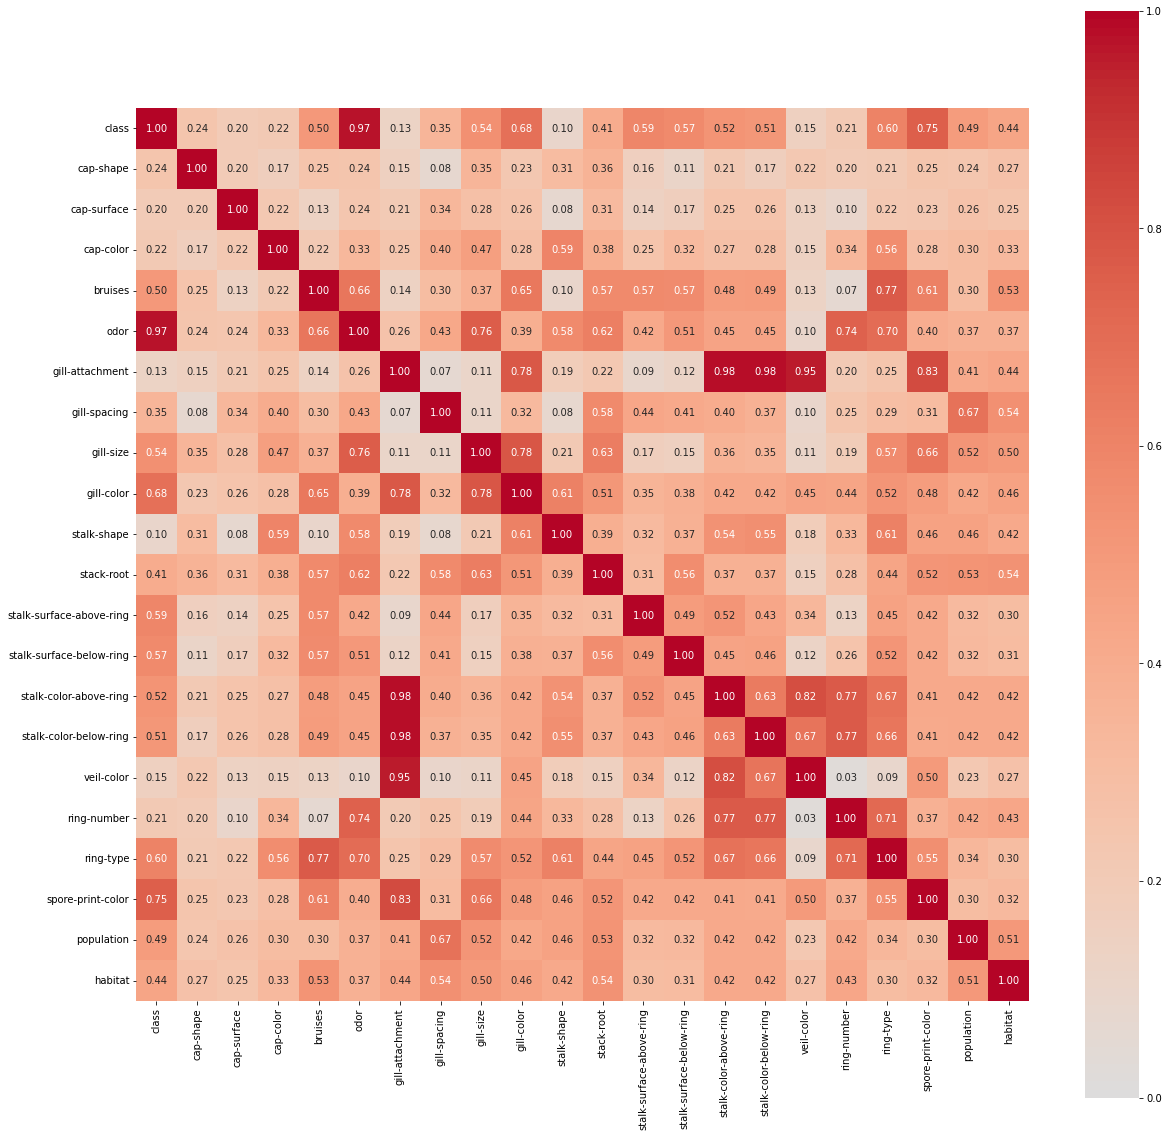

{'ax': <AxesSubplot:>,
 'corr':                              class  cap-shape  ...  population   habitat
 class                     1.000000   0.244330  ...    0.486775  0.439323
 cap-shape                 0.244330   1.000000  ...    0.240074  0.269842
 cap-surface               0.195997   0.202242  ...    0.260952  0.249577
 cap-color                 0.215889   0.168221  ...    0.304085  0.325199
 bruises                   0.501188   0.254415  ...    0.299568  0.530257
 odor                      0.970558   0.243577  ...    0.373698  0.368861
 gill-attachment           0.127951   0.152989  ...    0.413362  0.435707
 gill-spacing              0.347897   0.077849  ...    0.673533  0.541961
 gill-size                 0.539677   0.345956  ...    0.517249  0.498616
 gill-color                0.679877   0.232274  ...    0.423513  0.457212
 stalk-shape               0.101170   0.306119  ...    0.455486  0.417101
 stack-root                0.406224   0.359388  ...    0.529233  0.536186
 stalk-

In [25]:
nominal.associations(df, 
                     nominal_columns=boo,
                     figsize = (20,20),
                     cmap = 'coolwarm')


#Part 3: Mechine Learning

##Splitting 


In [26]:
df.duplicated().sum()

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stack-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [43]:
y = df['class']
X = df.drop(columns = ['class', 'veil-color'])# dropping Veil-type only cause it's all the same 

X_train , X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [44]:
cat_selector = make_column_selector(dtype_include='object')

ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_tuple = (ohe_encoder, cat_selector)

col_trans = make_column_transformer( cat_tuple, remainder = 'passthrough')
XGBC = XGBClassifier()

pipe = make_pipeline(col_trans, XGBC)

XGBClassifier

In [46]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6e1d4dc750>)])),
                ('xgbclassifier', XGBClassifier())])

In [47]:
print('Training accuracy:', pipe.score(X_train, y_train))
print('Testing accuracy:', pipe.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 1.0


In [48]:
pre = pipe.predict(X_test)

In [42]:
print(pre)

['Edible' 'Poisonous' 'Poisonous' ... 'Edible' 'Edible' 'Poisonous']


LGBMClassifier

In [50]:
LGBMC = LGBMClassifier()
LGBMC_pipe = make_pipeline(col_trans, LGBMC)

LGBMC_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6e1d4dc750>)])),
                ('lgbmclassifier', LGBMClassifier())])

In [51]:
print('Training accuracy:', LGBMC_pipe.score(X_train, y_train))
print('Testing accuracy:', LGBMC_pipe.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 1.0


In [52]:
LGBMC_pre = LGBMC_pipe.predict(X_test)

In [53]:
print(LGBMC_pre)

['Edible' 'Poisonous' 'Poisonous' ... 'Edible' 'Edible' 'Poisonous']


In [65]:
yes =  pre

In [66]:
print(yes)

['Edible' 'Poisonous' 'Poisonous' ... 'Edible' 'Edible' 'Poisonous']


In [67]:
#testing to see if both are the same.
for x in range(len(LGBMC_pre)):
    if LGBMC_pre[x] == pre[x]:
        yes[x] = 'yes'
    else:
        yes[x] = 'no'

In [70]:
df3 = pd.DataFrame(yes)

In [71]:
df3.value_counts()

yes    2031
dtype: int64

In [ ]:
pipe_two = make_pipeline()

KNeighborsClassifier

In [74]:

Knc_reg = KNeighborsClassifier(n_neighbors=8)
Knc_reg_pipe = make_pipeline(col_trans, Knc_reg)
Knc_reg_pipe.fit(X_train, y_train)

#evalute(y_test, Knc_reg_pipe.predict(X_test))

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6e1d4dc750>)])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=8))])

In [75]:
print('Training accuracy:', Knc_reg_pipe.score(X_train, y_train))
print('Testing accuracy:', Knc_reg_pipe.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 1.0


RandomForestClassifier

In [80]:
RFR_reg = RandomForestClassifier()
RFR_reg_pipe = make_pipeline(col_trans, RFR_reg)
RFR_reg_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6e1d4dc750>)])),
                ('randomforestclassifier', RandomForestClassifier())])

In [81]:
print('Training accuracy:', RFR_reg_pipe.score(X_train, y_train))
print('Testing accuracy:', RFR_reg_pipe.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

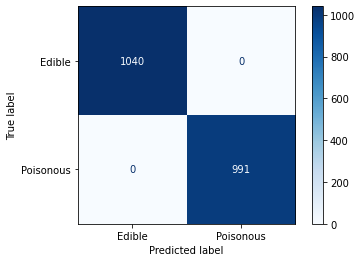

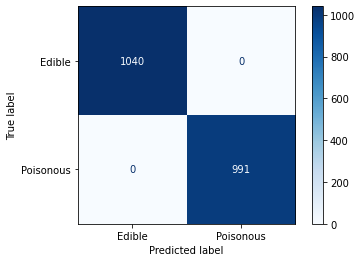

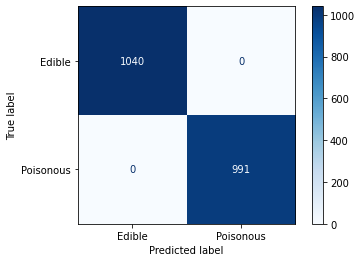

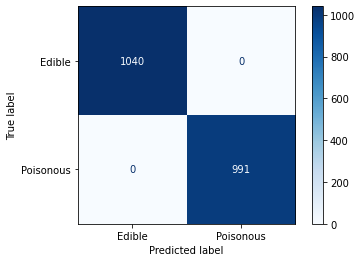

In [84]:
plot_confusion_matrix(pipe, X_test, y_test, cmap = 'Blues');
plot_confusion_matrix(LGBMC_pipe, X_test, y_test, cmap = 'Blues');
plot_confusion_matrix(Knc_reg_pipe, X_test, y_test, cmap = 'Blues');
plot_confusion_matrix(RFR_reg_pipe, X_test, y_test, cmap = 'Blues');